In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import plotly.express as pxp
import plotly.graph_objs as gph
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from numpy import where
from numpy import unique
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering


data = pd.read_excel('Book1.xlsx')
data.head()

,Name of the Company,Role,Job Location,Salary,Experience
0,TCS,ml engineer,India,0,4
1,TCS,ml engineer,India,1,5
2,TCS,ml engineer,India,2,6
3,TCS,ml engineer,India,3,7
4,TCS,ml engineer,India,4,8


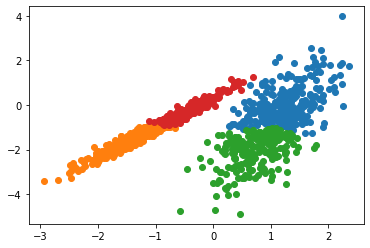

In [18]:
# Initializing data
train_data, _ = make_classification(n_samples=1000,
                                       n_features=2,
                                       n_informative=2,
                                       n_redundant=0,
                                       n_clusters_per_class=1,
                                       random_state=4)

agg_mdl = AgglomerativeClustering(n_clusters=4)

# each data point assigned to cluster
agg_result = agg_mdl.fit_predict(train_data)

# Obtain all clusters which are unique
agg_clusters = unique(agg_result)

# plot clusters
for agg_cluster in agg_clusters:
    # fetch data point that fall in this clstr
    index = where(agg_result == agg_cluster)

    plot.scatter(train_data[index, 0], train_data[index,1])
    
# Agglomerative hierarchy plot
plot.show()

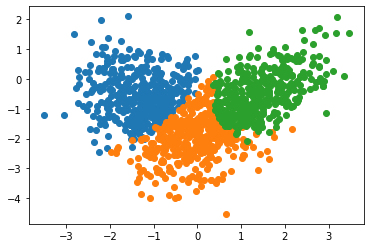

In [19]:
#init data
train_data, _ = make_classification(n_samples=1200,
                                       n_features=3,
                                       n_informative=2,
                                       n_redundant=0,
                                       n_clusters_per_class=1,
                                       random_state=4)

gaussian_mdl = GaussianMixture(n_components=3)

# model training
gaussian_mdl.fit(train_data)

# data points assigned to a cluster
gaussian_res = gaussian_mdl.fit_predict(train_data)

# get clusters which are unique
gaussian_clstr = unique(gaussian_res)

# Plot 
for gaussian_cluser in gaussian_clstr:
    
    index = where(gaussian_res == gaussian_cluser)
    # plot
    plot.scatter(train_data[index, 0], train_data[index, 1])
    
# show plot
plot.show()

In [20]:
data

,Name of the Company,Role,Job Location,Salary,Experience
0,TCS,ml engineer,India,0,4
1,TCS,ml engineer,India,1,5
2,TCS,ml engineer,India,2,6
3,TCS,ml engineer,India,3,7
4,TCS,ml engineer,India,4,8
...,...,...,...,...,...
1285,Oportun,ml engineer,India,1,4
1286,Dell,ml engineer,India,8,2
1287,Philips India Limited,ml engineer,India,8,1
1288,Uber,ml engineer,India,2,2


C:\Users\fazlu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\fazlu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



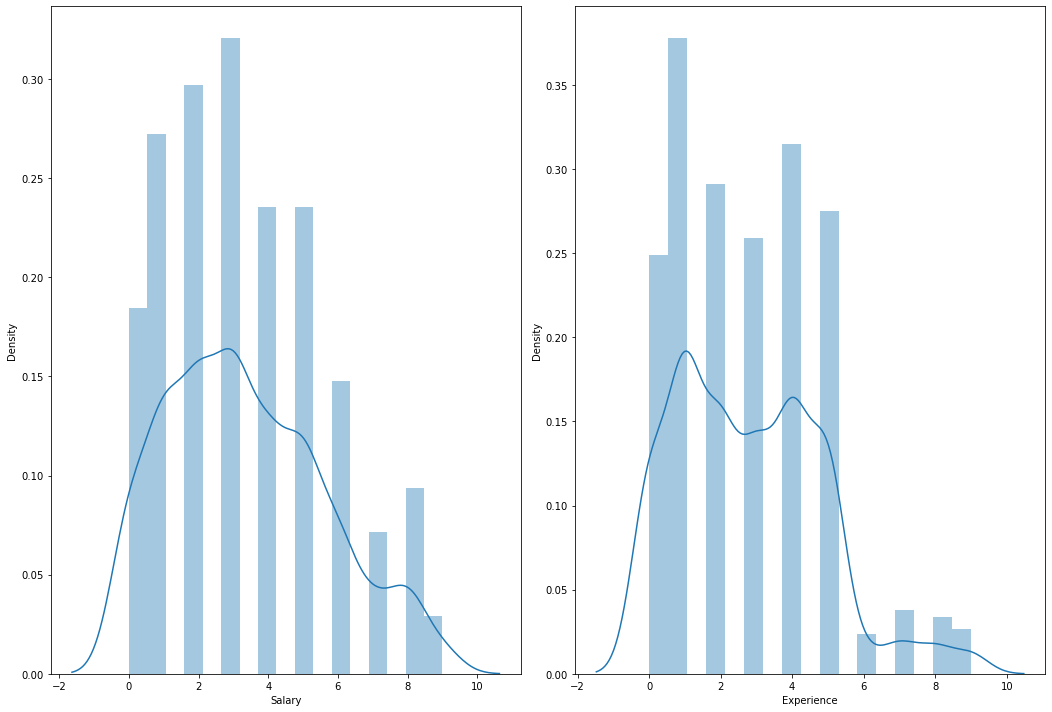

In [22]:
plot.figure(figsize = (22, 10))
plotnum = 1

for cols in ['Salary', 'Experience']:
    if plotnum <= 3:
        axs = plot.subplot(1, 3, plotnum)
        sns.distplot(data[cols])
        
    plotnum += 1
    
plot.tight_layout()
plot.show()

In [24]:
salary_5_and_above = data.Salary[data.Salary >= 5]
salary_4_and_5_below = data.Salary[(data.Salary >= 4) & (data.Salary <=5)]
salary_3_and_4_below =  data.Salary[(data.Salary >= 3) & (data.Salary <=4)]                                    
salary_2_and_3_below =  data.Salary[(data.Salary >= 2) & (data.Salary <=3)]                                     
salary_1_and_2_below =  data.Salary[(data.Salary >= 1) & (data.Salary <=2)]
salary_0_and_1_below =  data.Salary[(data.Salary >= 0) & (data.Salary <=1)]                              

In [25]:
experience_5_and_above = data.Experience[data.Experience >= 5]
experience_4_and_5_below = data.Experience[(data.Experience >= 4) & (data.Experience <=5)]
experience_3_and_4_below = data.Experience[(data.Experience >= 3) & (data.Experience <=4)]
experience_2_and_3_below = data.Experience[(data.Experience >= 2) & (data.Experience <=3)]
experience_1_and_2_below = data.Experience[(data.Experience >= 1) & (data.Experience <=2)]
experience_0_and_1_below = data.Experience[(data.Experience >= 0) & (data.Experience <=1)]

In [26]:
x_salary_ax = ['0-1', '1-2', '2-3', '3-4', '4-5+']
y_salary_ax = [len(salary_0_and_1_below.values), len(salary_1_and_2_below.values), len(salary_2_and_3_below.values),
               len(salary_3_and_4_below.values),len(salary_5_and_above.values)]

pxp.bar(data_frame = data, x = x_salary_ax, y = y_salary_ax, color = x_salary_ax,
       title = 'Count of requirements per ctc group ')

In [27]:
x_experience_ax = ['0-1', '1-2', '2-3', '3-4', '4-5+']
y_experience_ax = [len(experience_0_and_1_below.values), len(experience_1_and_2_below.values),
               len(experience_2_and_3_below.values),
               len(experience_3_and_4_below.values),len(experience_5_and_above.values)]

pxp.bar(data_frame = data, x = x_experience_ax, y = y_experience_ax, color = x_experience_ax,
       title = 'Count of requirements per experience group ')

In [28]:
data.head()

,Name of the Company,Role,Job Location,Salary,Experience
0,TCS,ml engineer,India,0,4
1,TCS,ml engineer,India,1,5
2,TCS,ml engineer,India,2,6
3,TCS,ml engineer,India,3,7
4,TCS,ml engineer,India,4,8


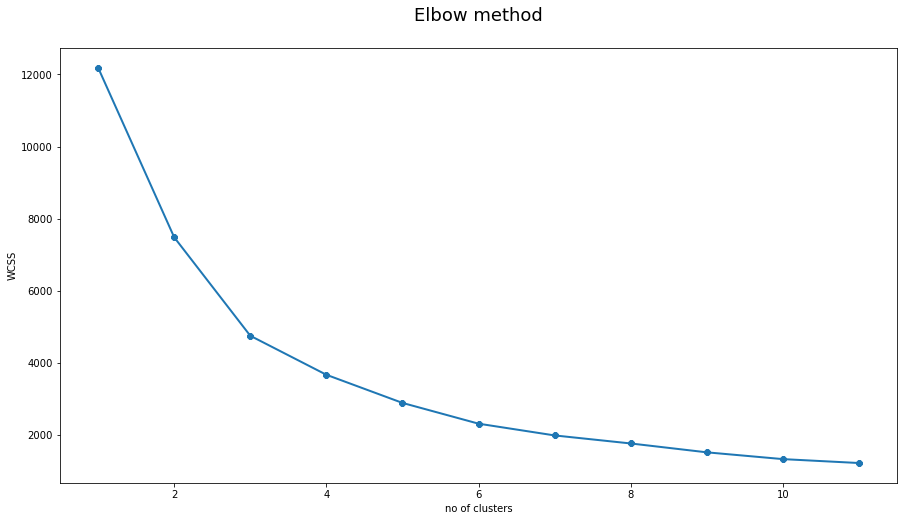

In [31]:
x_input = data.loc[:, ['Salary', 'Experience']].values


wcss = []
for k in range(1, 12):
    k_means = KMeans(n_clusters=k, init='k-means++')
    k_means.fit(x_input)
    wcss.append(k_means.inertia_)
    
plot.figure(figsize=(15,8))

plot.plot(range(1, 12), wcss, linewidth=2, marker='8')
plot.title('Elbow method\n', fontsize=18)
plot.xlabel('no of clusters')
plot.ylabel('WCSS')
plot.show()

In [33]:
from sklearn.metrics import silhouette_score
label = k_means.predict(x_input)
# Calculating Silhouette score
print(f' Silhouette Score(n=4): {silhouette_score(x_input,label)}')

 Silhouette Score(n=4): 0.3999100394857647


In [34]:
k_means=KMeans(n_clusters=4)
labels=k_means.fit_predict(x_input)
print(k_means.cluster_centers_)

[[1.6030303  1.03939394]
 [5.36619718 5.4084507 ]
 [1.73521851 4.16452442]
 [5.56424581 1.38547486]]


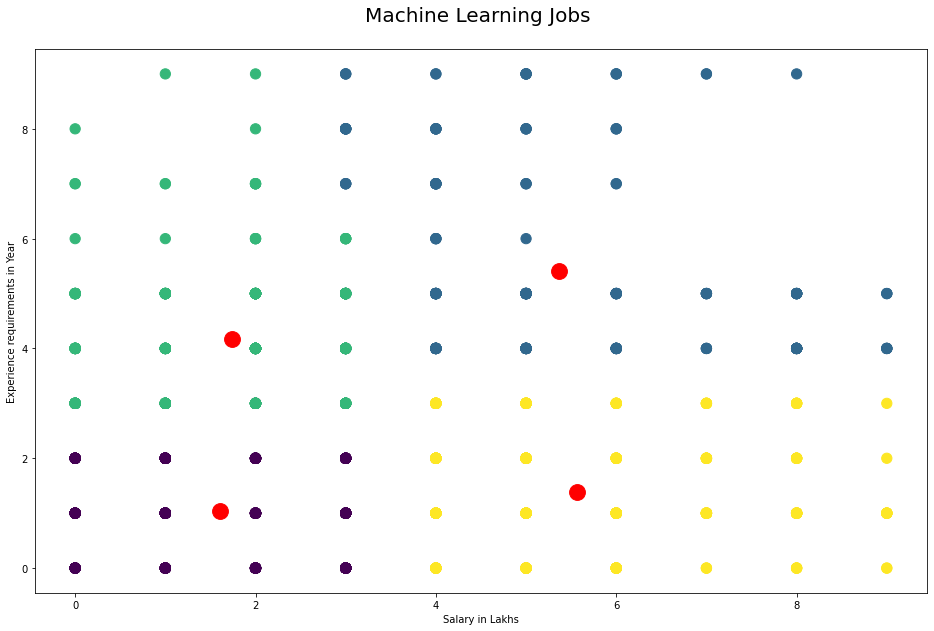

In [39]:
plot.figure(figsize = (16, 10))
plot.scatter(x_input[:, 0], x_input[:, 1], c =
k_means.labels_, s = 105)
plot.scatter(k_means.cluster_centers_[:, 0],k_means.cluster_centers_[:, 1], color = 'red', s = 250)
plot.title('Machine Learning Jobs \n', fontsize = 20)
plot.xlabel('Salary in Lakhs')
plot.ylabel('Experience requirements in Year')
plot.show()
#Red dots indicate cluster centers.